<a href="https://colab.research.google.com/github/giakomorssi/Deloitte_Project/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change Colab runtime to GPU
import os
os.environ['COLAB_TPU_ADDR'] = ''
os.environ['COLAB_GPU_ALLOC'] = '1'
os.environ['COLAB_GPU'] = '1'
print("Runtime switched to GPU")

import tensorflow as tf

if not tf.test.gpu_device_name():
    print('GPU device not found')
else:
    print('GPU device found:', tf.test.gpu_device_name())

# This code sets the runtime to use the GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Runtime switched to GPU
GPU device not found
Please install GPU version of TF


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df = pd.read_csv('/content/drive/MyDrive/University/Deloitte/SupplyChainDataset.csv', encoding = 'latin-1')

In [57]:
df.shape

(180519, 53)

In [58]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [59]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [60]:
df.nunique(axis=0)

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [61]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,nan,141.232550,0.000000
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,nan,139.732492,0.000000
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,nan,9.990000,0.000000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,nan,50.000000,0.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,nan,59.990002,0.000000
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,nan,199.990005,0.000000
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,nan,1999.989990,0.000000


In [62]:
null_counts = df.isna().sum()

for i, j in enumerate(range(len(null_counts))):
  if null_counts[i].sum() == 0:
      print('There are no null values')
  else:
      print(f'The Column `{df.columns[j]}` has {null_counts[i]} null values')

There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
The Column `Customer Lname` has 8 null values
There are no null values
There are no null values
There are no null values
There are no null values
The Column `Customer Zipcode` has 3 null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There 

In [63]:
# define dictionaries to map status values to categories
regular_dict = {'COMPLETE': 'Regular', 'PENDING': 'Regular', 'PENDING_PAYMENT': 'Regular', 'PROCESSING': 'Regular'}
suspected_dict = {'CLOSED': 'Suspected', 'CANCELED': 'Suspected', 'ON_HOLD': 'Suspected', 'PAYMENT_REVIEW': 'Suspected'}
fraud_dict = {'SUSPECTED_FRAUD': 'Fraud'}

# create a function to map status values to categories
def map_category(status):
    if status in regular_dict:
        return regular_dict[status]
    elif status in suspected_dict:
        return suspected_dict[status]
    elif status in fraud_dict:
        return fraud_dict[status]
    else:
        return 'Unknown'

# apply the function to the 'status' column to create a new 'category' column
df['Category'] = df['Order Status'].apply(map_category)

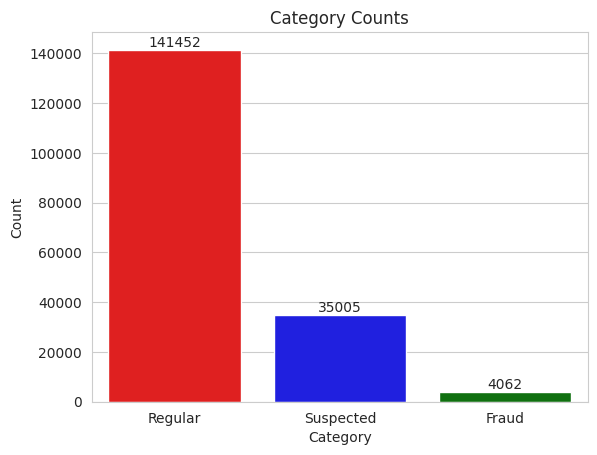

In [64]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

temp = df["Category"].value_counts()
df1 = pd.DataFrame({'Category': temp.index,'values': temp.values})

# define the colors for each category
colors = ['red', 'blue', 'green']

# create the bar plot with colors and legend
sns.set_style('whitegrid')
ax = sns.barplot(x='Category', y='values', data=df1, palette=colors)

# set the axis labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')

# add the number on top of each bar
for i, v in enumerate(df1['values']):
    ax.text(i, v, str(v), ha='center', va='bottom')


# show the plot
plt.show()

In [65]:
# Find columns with identical values
duplicate_cols = []
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and df[col1].equals(df[col2]):
            duplicate_cols.append((col1, col2))

# Print the results
if len(duplicate_cols) > 0:
    print("The following columns have the exact same values:")
    for col1, col2 in duplicate_cols:
        print(f"- {col1} and {col2}")
else:
    print("No columns have the exact same values.")

The following columns have the exact same values:
- Benefit per order and Order Profit Per Order
- Sales per customer and Order Item Total
- Category Id and Product Category Id
- Customer Email and Customer Password
- Customer Id and Order Customer Id
- Customer Password and Customer Email
- Order Customer Id and Customer Id
- Order Item Cardprod Id and Product Card Id
- Order Item Product Price and Product Price
- Order Item Total and Sales per customer
- Order Profit Per Order and Benefit per order
- Product Card Id and Order Item Cardprod Id
- Product Category Id and Category Id
- Product Price and Order Item Product Price


In [66]:
df.drop(['Product Description', 'Order Zipcode', 'Order Profit Per Order', 'Customer Email', 'Customer Password', 'Customer Country', 'Customer Id', 
         'Customer Fname', 'Customer Lname', 'Customer Street', 'Order Country', 'Product Card Id', 'Product Category Id', 'Product Image', 
         'Customer State', 'Customer Zipcode', 'Order Item Total', 'Order Customer Id', 
         'Order State', 'Product Name', 'Category Id', 'Order Id',	'Order Item Cardprod Id', 'Order Item Id'], 
        axis = 1, inplace = True)

In [67]:
null_counts = df.isna().sum()

if null_counts.sum() == 0:
    print('There are no null values')
else:
    print(null_counts)

There are no null values


In [68]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Name                     object
Customer City                     object
Customer Segment                  object
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
order date (DateOrders)           object
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Product Price         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Order Region                      object
Order Status    

In [69]:
df.to_csv('/content/drive/MyDrive/University/Deloitte/SupplyChainDataset_eda.csv')

### General analysis

**Market**

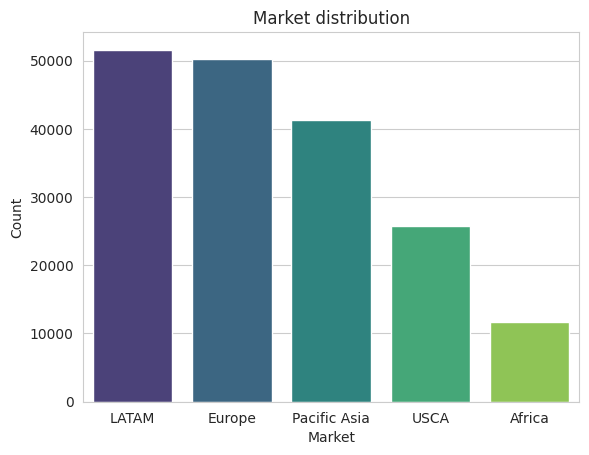

In [70]:
plt.show()
sns.countplot(data=df, x="Market", palette='viridis', order=df['Market'].value_counts().index)

plt.xlabel("Market")
plt.ylabel("Count")
plt.title("Market distribution")

plt.show()

**Scheduled shipping days vs real shipment days**

Scheduled

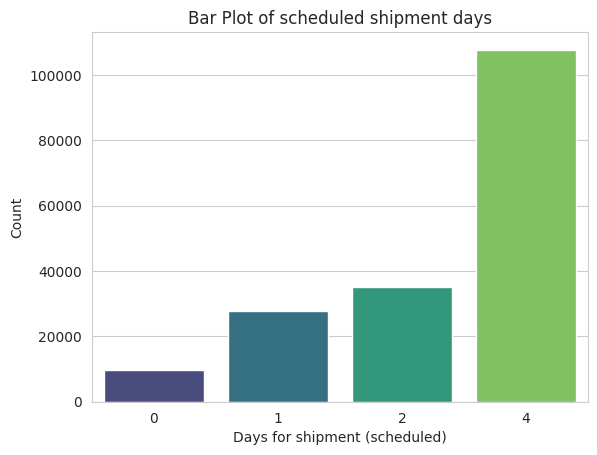

In [71]:
sns.countplot(data = df, x = "Days for shipment (scheduled)", palette = 'viridis')

plt.xlabel("Days for shipment (scheduled)")
plt.ylabel("Count")
plt.title("Bar Plot of scheduled shipment days")

plt.show()

Real

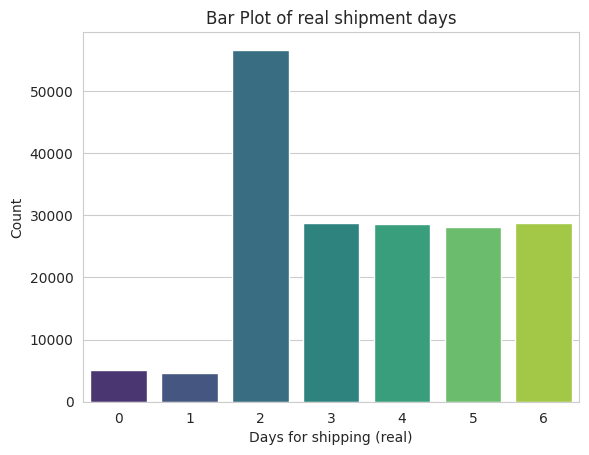

In [72]:
sns.countplot(data = df, x = "Days for shipping (real)", palette = 'viridis')

plt.xlabel("Days for shipping (real)")
plt.ylabel("Count")
plt.title("Bar Plot of real shipment days")

plt.show()

**Delivery status distribution**

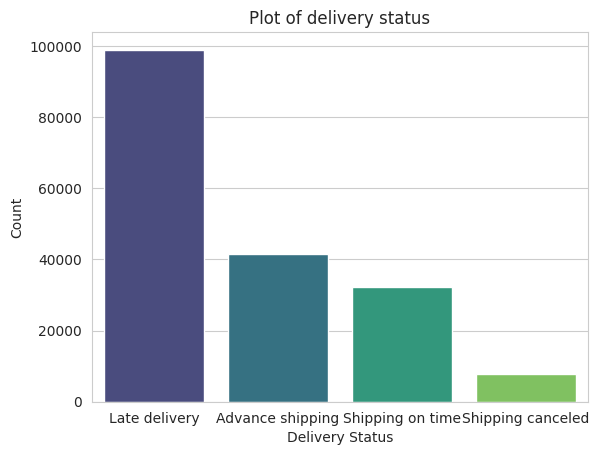

In [73]:
sns.countplot(data = df, x = "Delivery Status", palette = 'viridis', order=df['Delivery Status'].value_counts().index)

plt.xlabel("Delivery Status")
plt.ylabel("Count")
plt.title("Plot of delivery status")

plt.show()

**Type**

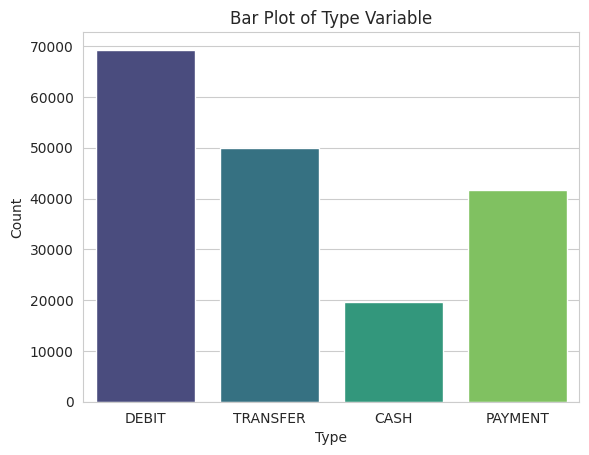

In [74]:
sns.countplot(data = df, x = "Type", palette = 'viridis')

plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Bar Plot of Type Variable")

plt.show()

**Category name**

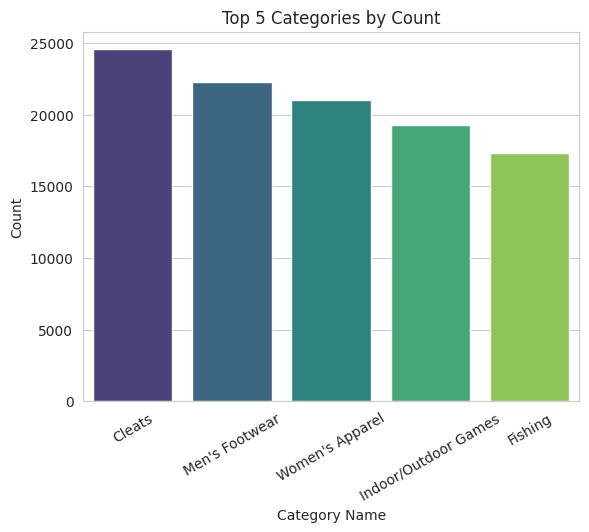

In [75]:
top_categories = df['Category Name'].value_counts().nlargest(5)

ax = sns.countplot(data = df, x="Category Name", order=top_categories.index, palette = 'viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('Category Name')
ax.set_ylabel('Count')
ax.set_title('Top 5 Categories by Count')

plt.show()

**Customer segment**

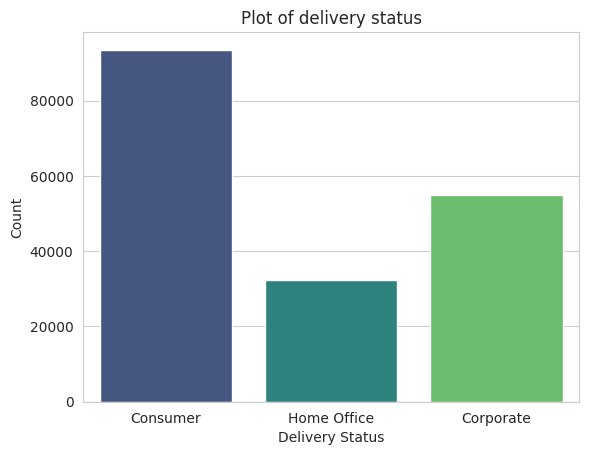

In [76]:
sns.countplot(data = df, x = "Customer Segment", palette = 'viridis')

plt.xlabel("Delivery Status")
plt.ylabel("Count")
plt.title("Plot of delivery status")

plt.show()

### Category

**Distribution of Category**

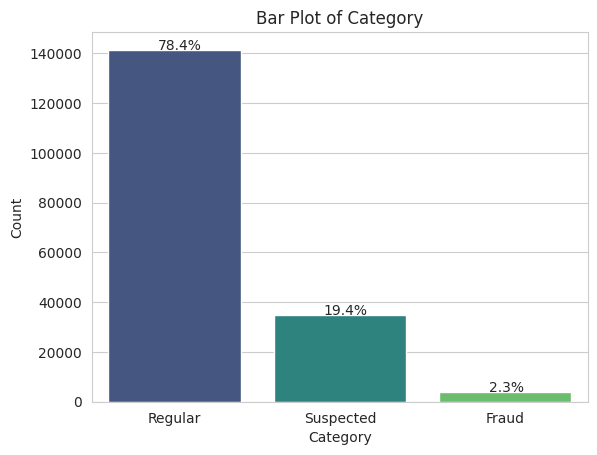

In [77]:
ax = sns.countplot(data=df, x="Category", palette='viridis')

ax.set_xlabel('Category')
ax.set_ylabel('Count')

ax.set_title('Bar Plot of Category')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10))

plt.show()


**Top 5 Product Categories based on fraud counts**

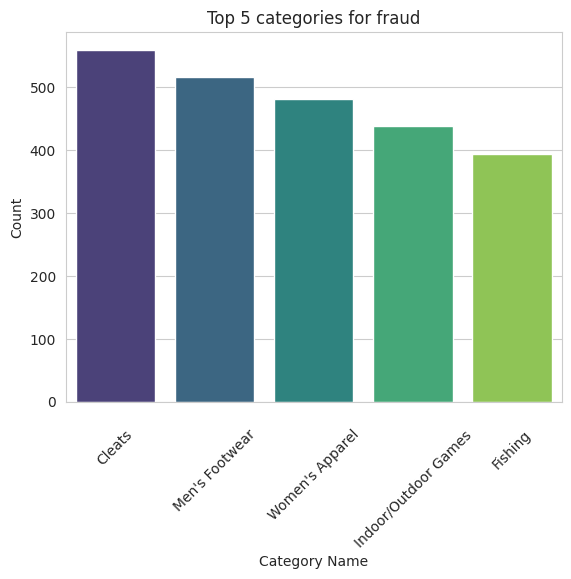

In [78]:
df_fraud = df[df['Category'] == 'Fraud']

# Group the data by Order City and count the number of fraud cases
cat_fraud_counts = df_fraud.groupby('Category Name')['Category'].count().reset_index(name='Count')

# Sort the data in descending order by fraud count and take the top 5 cities
top_cat = cat_fraud_counts.sort_values('Count', ascending=False).head(5)

ax = sns.barplot(data=top_cat, x='Category Name', y='Count', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='x', which='major', pad=15)

ax.set_xlabel("Category Name")
ax.set_ylabel("Count")

ax.set_title("Top 5 categories for fraud")

plt.show()

**Fraud in continents (Order Region)**

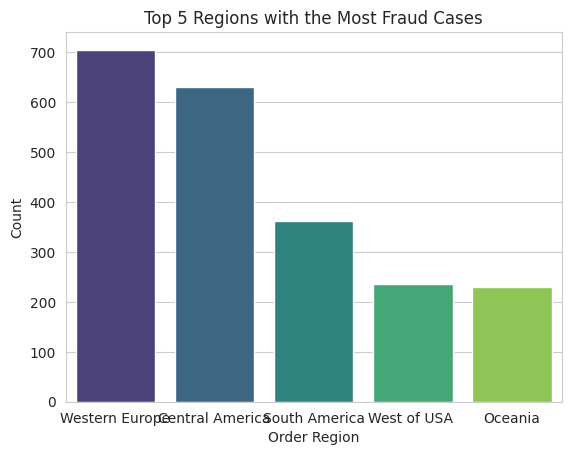

In [79]:
df_fraud = df[df['Category'] == 'Fraud']

# Group the data by Order City and count the number of fraud cases
city_fraud_counts = df_fraud.groupby('Order Region')['Category'].count().reset_index(name='Count')

# Sort the data in descending order by fraud count and take the top 5 cities
top_cities = city_fraud_counts.sort_values('Count', ascending=False).head(5)

sns.barplot(data=top_cities, x='Order Region', y='Count', palette='viridis')

plt.xlabel('Order Region')
plt.title('Top 5 Regions with the Most Fraud Cases')

plt.show()

**Top 5 cities for fraud cases**

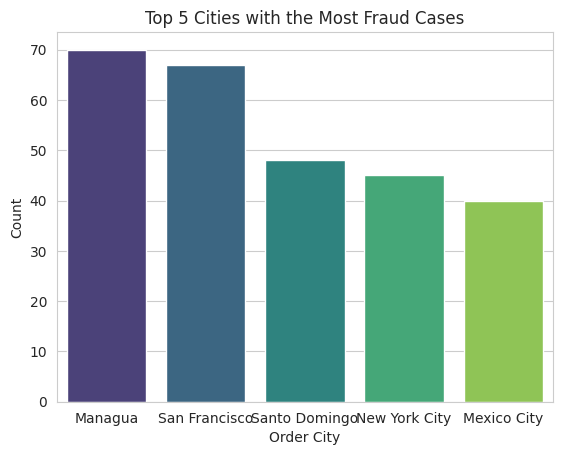

In [80]:
df_fraud = df[df['Category'] == 'Fraud']

# Group the data by Order City and count the number of fraud cases
city_fraud_counts = df_fraud.groupby('Order City')['Category'].count().reset_index(name='Count')

# Sort the data in descending order by fraud count and take the top 5 cities
top_cities = city_fraud_counts.sort_values('Count', ascending=False).head(5)

sns.barplot(data = top_cities, x = 'Order City', y = 'Count', palette = 'viridis')

plt.xlabel('Order City')
plt.title('Top 5 Cities with the Most Fraud Cases')

plt.show()

**Box plot of Order Item Total and Category**

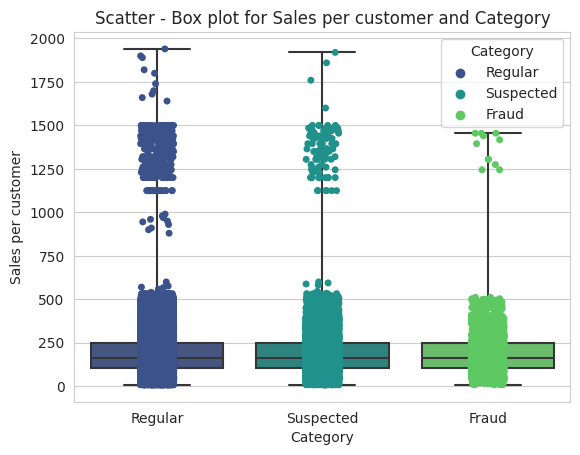

              count        mean         std   min         25%         50%  \
Category                                                                    
Fraud        4062.0  182.543653  120.750742  8.66  104.379997  163.929993   
Regular    141452.0  183.110768  119.959846  7.49  104.379997  163.990005   
Suspected   35005.0  183.160283  120.302996  7.49  104.370003  163.979996   

                  75%         max  
Category                           
Fraud      247.474998  1455.00000  
Regular    247.399994  1939.98999  
Suspected  247.500000  1919.98999  


In [81]:
sns.boxplot(data=df, x='Category', y= "Sales per customer", whis=np.inf, palette="viridis")

sns.stripplot(data=df, x='Category', y= "Sales per customer", jitter=True, hue='Category', palette='viridis')

plt.title('Scatter - Box plot for Sales per customer and Category')
plt.show()

category_stats = df.groupby('Category')['Sales per customer'].describe()
print(category_stats)

**Benefit per order and Category**

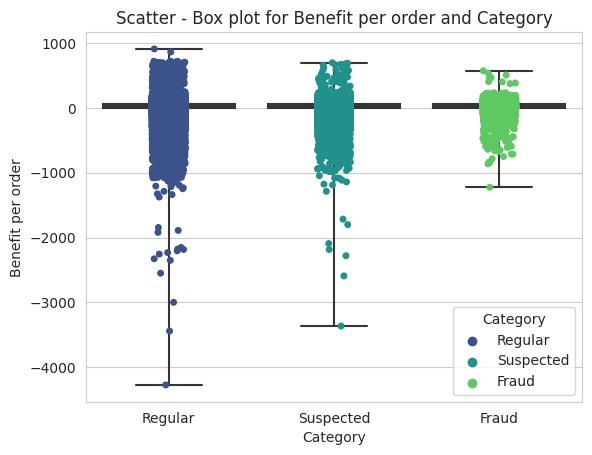

              count       mean         std         min     25%    50%  \
Category                                                                
Fraud        4062.0  20.959308  102.371949 -1222.27002  6.2225  30.82   
Regular    141452.0  21.887974  104.270308 -4274.97998  7.0175  31.60   
Suspected   35005.0  22.444467  105.326773 -3366.00000  7.0900  31.35   

                 75%         max  
Category                          
Fraud      63.700001  574.200012  
Regular    64.800003  911.799988  
Suspected  65.000000  697.950012  


In [82]:
sns.boxplot(data=df, x='Category', y="Benefit per order", whis=np.inf, palette="viridis")

sns.stripplot(data=df, x='Category', y="Benefit per order", jitter=True, hue='Category', palette='viridis')

plt.title('Scatter - Box plot for Benefit per order and Category')
plt.show()

category_stats = df.groupby('Category')['Benefit per order'].describe()
print(category_stats)

### Late delivery

**Late_delivery_risk distribution**

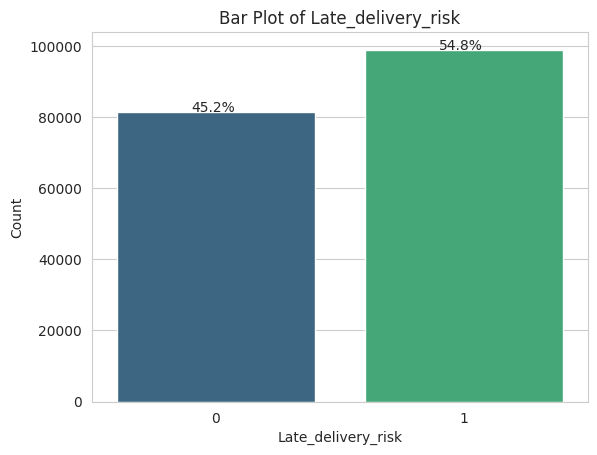

In [83]:
ax = sns.countplot(data=df, x="Late_delivery_risk", palette='viridis')

ax.set_xlabel('Late_delivery_risk')
ax.set_ylabel('Count')

ax.set_title('Bar Plot of Late_delivery_risk')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10))

plt.show()

**Scheduled shipment days and late delivery risk**

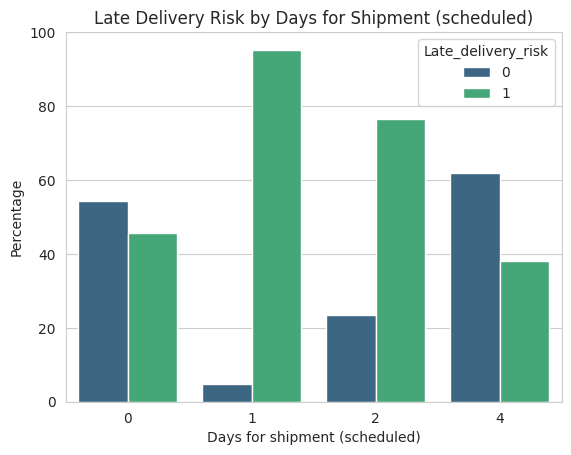

In [84]:
# Compute percentage of late delivery risk for each day
counts = df.groupby('Days for shipment (scheduled)')['Late_delivery_risk'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

sns.barplot(data=counts, x='Days for shipment (scheduled)', y='Percentage', hue='Late_delivery_risk', palette='viridis')

plt.xlabel('Days for shipment (scheduled)')
plt.ylabel('Percentage')
plt.title('Late Delivery Risk by Days for Shipment (scheduled)')

plt.show()

**Real shipment days and late delivery risk**

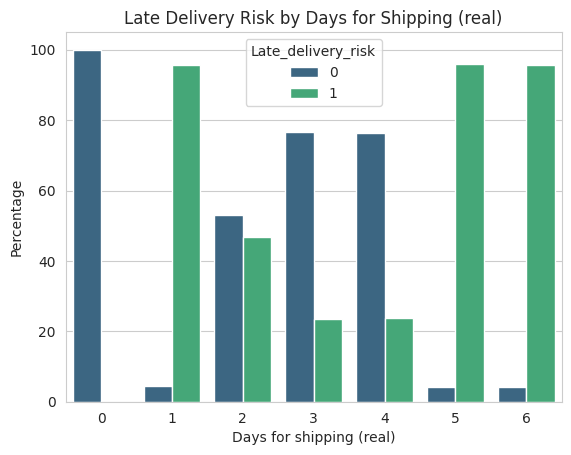

In [85]:
# Compute percentage of late delivery risk for each day
counts = df.groupby('Days for shipping (real)')['Late_delivery_risk'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

sns.barplot(data=counts, x='Days for shipping (real)', y='Percentage', hue='Late_delivery_risk', palette='viridis')

plt.xlabel('Days for shipping (real)')
plt.ylabel('Percentage')
plt.title('Late Delivery Risk by Days for Shipping (real)')

plt.show()

**Customer Segment based on risk of late delivery**

Text(0.5, 1.0, 'Late Delivery Risk by Customer Segment')

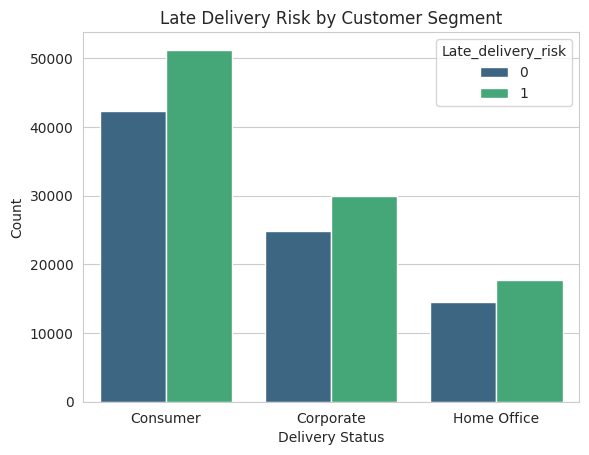

In [86]:
ax = sns.countplot(x='Customer Segment', hue='Late_delivery_risk', data=df, order=df['Customer Segment'].value_counts().index, palette='viridis')

# calculate the percentages for each category of Delivery Status
percentages = df.groupby('Customer Segment')['Late_delivery_risk'].mean() * 100

# create a list of category names in the order they appear in the plot
categories = df['Customer Segment'].value_counts().index.tolist()

# add the percentages as text on top of each bar
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 10
    category = categories[i % len(categories)]

plt.gca().set_xlabel('Delivery Status')
plt.gca().set_ylabel('Count')
plt.gca().set_title('Late Delivery Risk by Customer Segment')

**Scatter - box plot of Benefit per order and Late delivery risk**

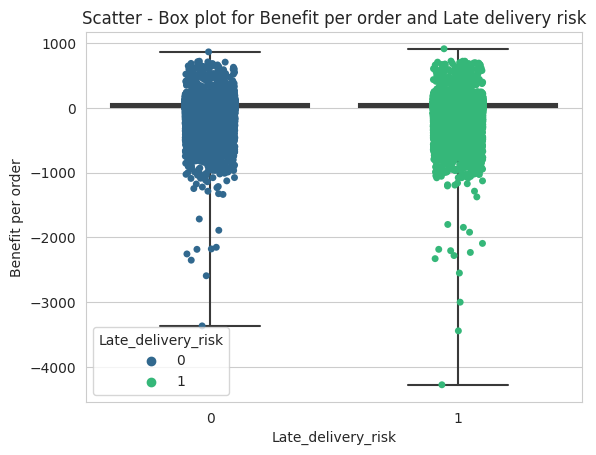

                      count       mean         std         min   25%    50%  \
Late_delivery_risk                                                            
0                   81542.0  22.403808  103.163253 -3366.00000  7.17  31.68   
1                   98977.0  21.621707  105.467754 -4274.97998  6.86  31.43   

                          75%         max  
Late_delivery_risk                         
0                   65.000000  864.000000  
1                   64.739998  911.799988  


In [87]:
sns.boxplot(data=df, x='Late_delivery_risk', y="Benefit per order", whis=np.inf, palette="viridis")

sns.stripplot(data=df, x='Late_delivery_risk', y="Benefit per order", jitter=True, hue='Late_delivery_risk', palette='viridis')

plt.title('Scatter - Box plot for Benefit per order and Late delivery risk')
plt.show()

category_stats = df.groupby('Late_delivery_risk')['Benefit per order'].describe()
print(category_stats)